In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

## LB-08A

In [3]:
lb08A = pd.read_csv('datasets/LB-08A.csv')
lb08A.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   depth        451 non-null    float64
 1   density      451 non-null    float64
 2   caliper      451 non-null    float64
 3   mag_suscep   451 non-null    float64
 4   scaler_tmi   451 non-null    float64
 5   total_gamma  451 non-null    float64
 6   lithology    451 non-null    object 
dtypes: float64(6), object(1)
memory usage: 24.8+ KB


In [4]:
lb08A["lithology"] = lb08A["lithology"].astype("str")
lb08A.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   depth        451 non-null    float64
 1   density      451 non-null    float64
 2   caliper      451 non-null    float64
 3   mag_suscep   451 non-null    float64
 4   scaler_tmi   451 non-null    float64
 5   total_gamma  451 non-null    float64
 6   lithology    451 non-null    object 
dtypes: float64(6), object(1)
memory usage: 24.8+ KB


array([[<AxesSubplot: title={'center': 'depth'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'caliper'}>,
        <AxesSubplot: title={'center': 'mag_suscep'}>],
       [<AxesSubplot: title={'center': 'scaler_tmi'}>,
        <AxesSubplot: title={'center': 'total_gamma'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

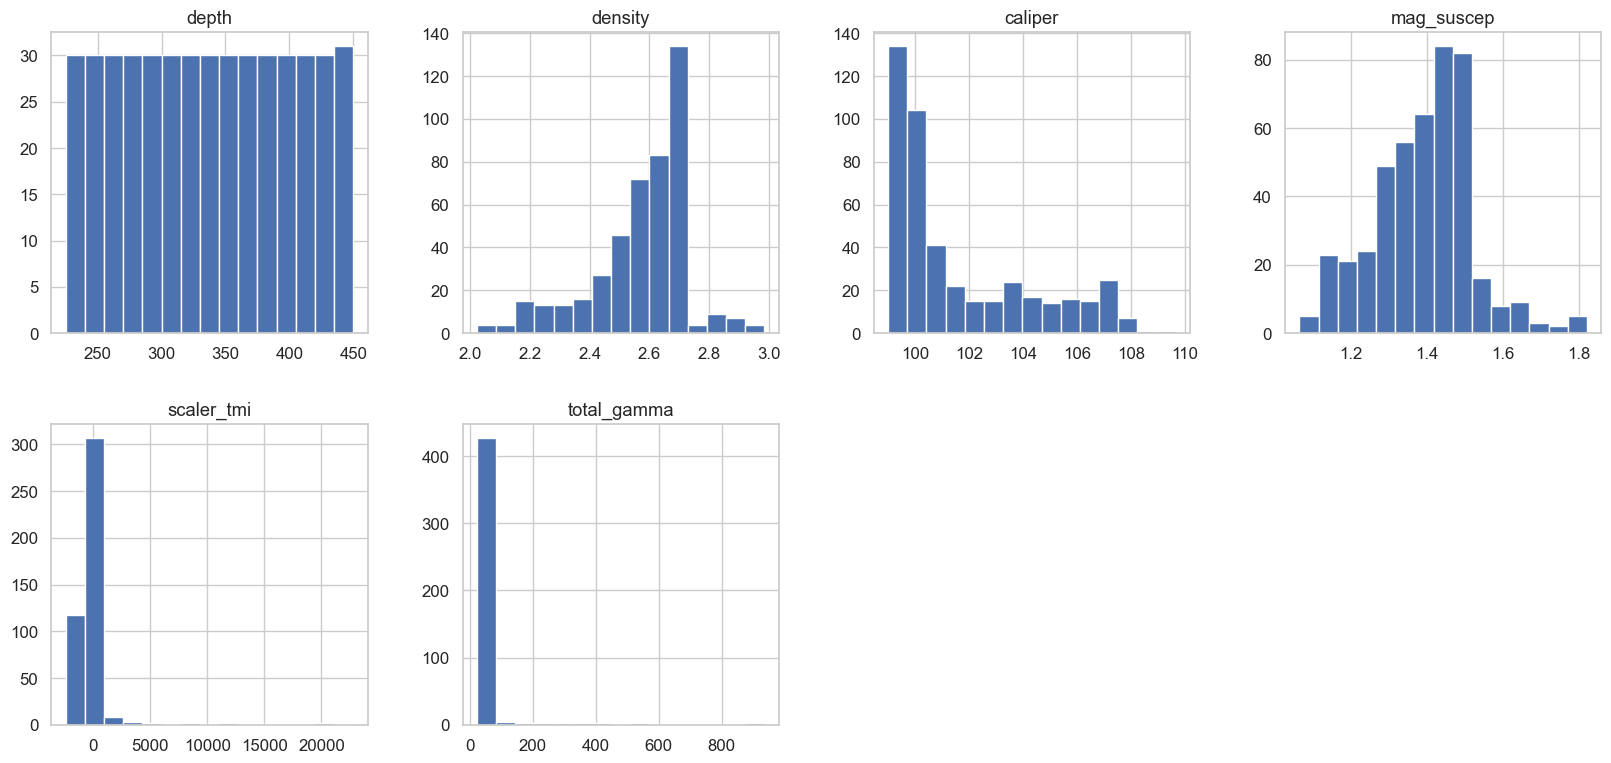

In [5]:
lb08A.hist(bins=15, figsize=(20,9), layout=(2, 4))


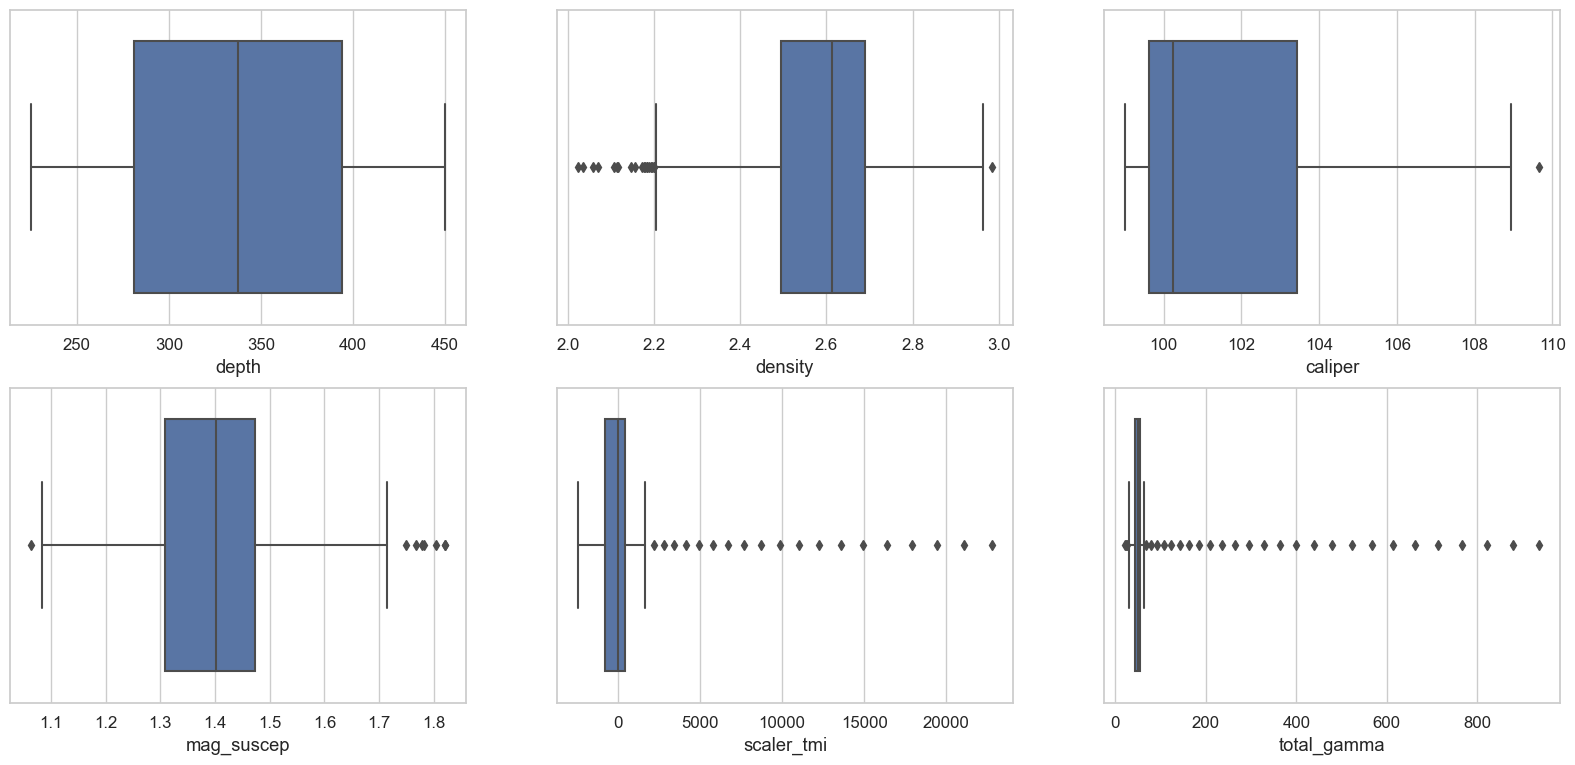

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(20, 9))

for property, subplot in zip(lb08A.columns, ax.flatten()):

    sns.boxplot(x=lb08A[property], ax=subplot)


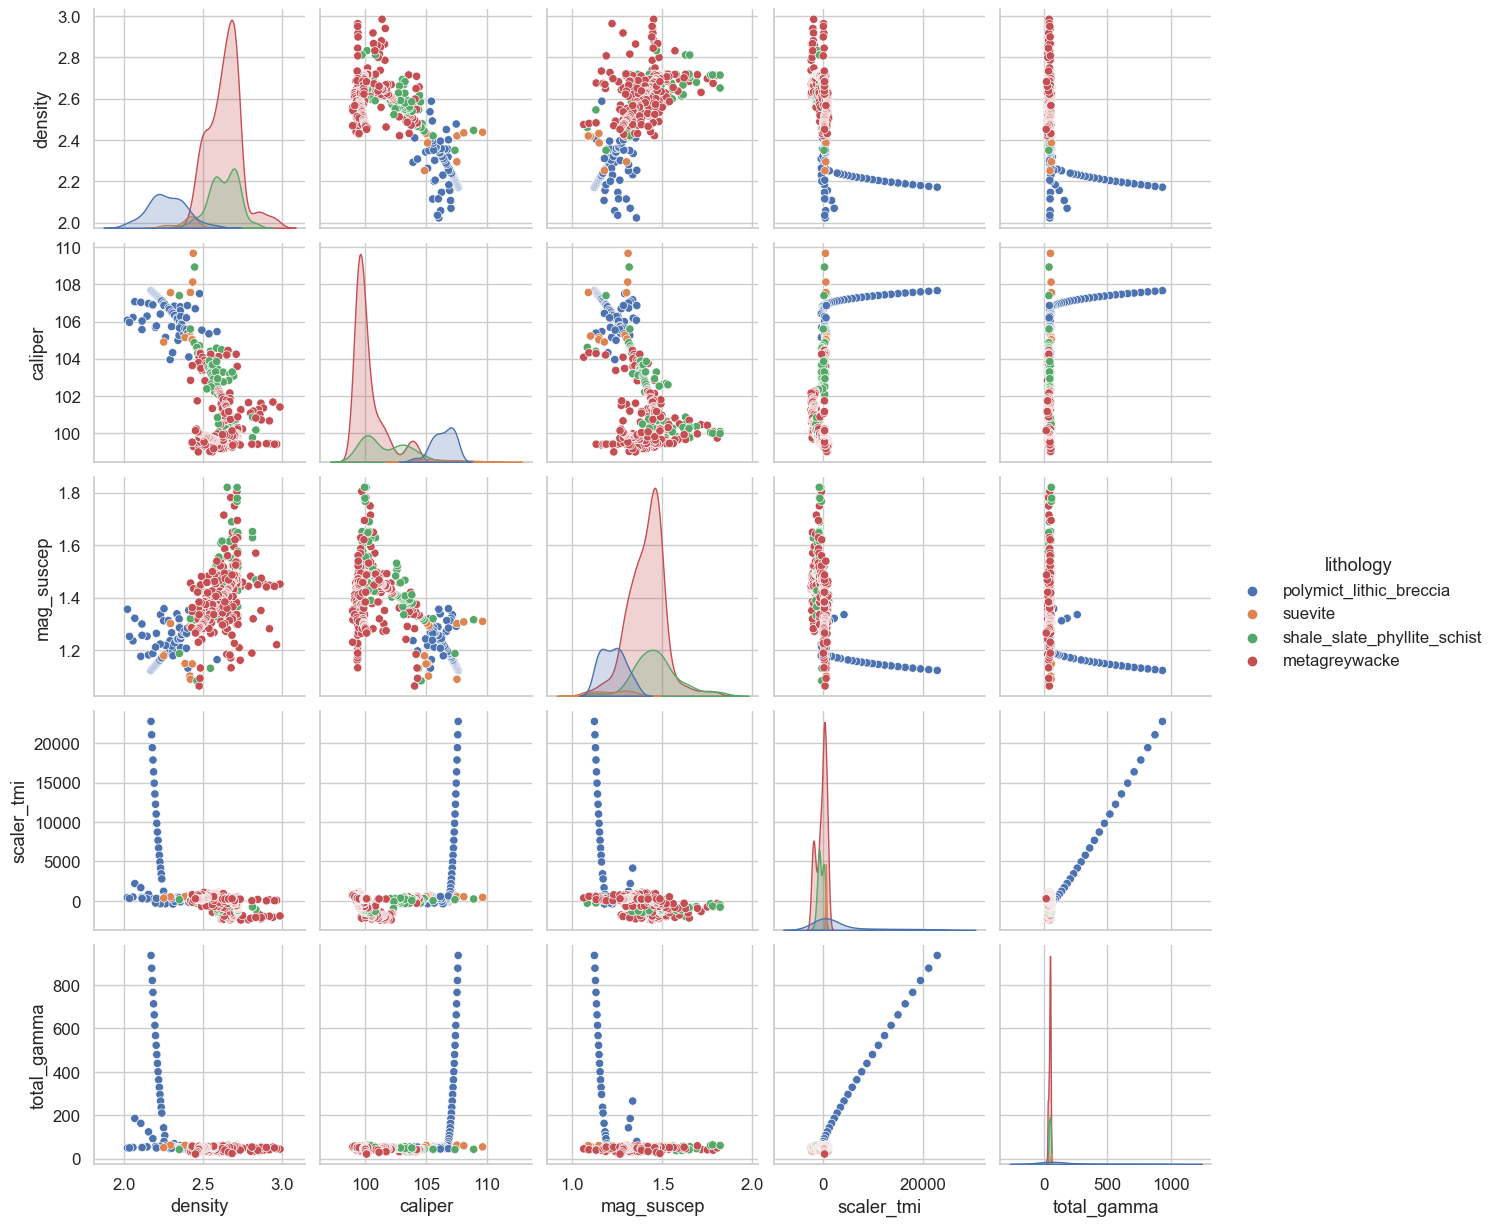

In [7]:
sns.pairplot(lb08A.drop(["depth"], axis=1), hue="lithology")

C:\Users\steve\AppData\Local\Temp\ipykernel_14924\1942924309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lb07A_corr = lb08A.corr()


<AxesSubplot: >

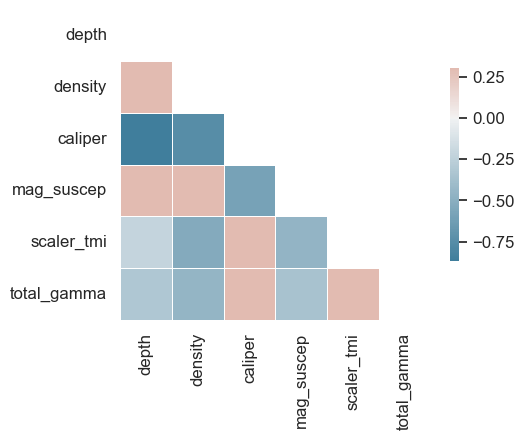

In [8]:
lb07A_corr = lb08A.corr()
mask = np.triu(np.ones_like(lb07A_corr, dtype=bool))
fig, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(lb07A_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot: xlabel='lithology', ylabel='count'>

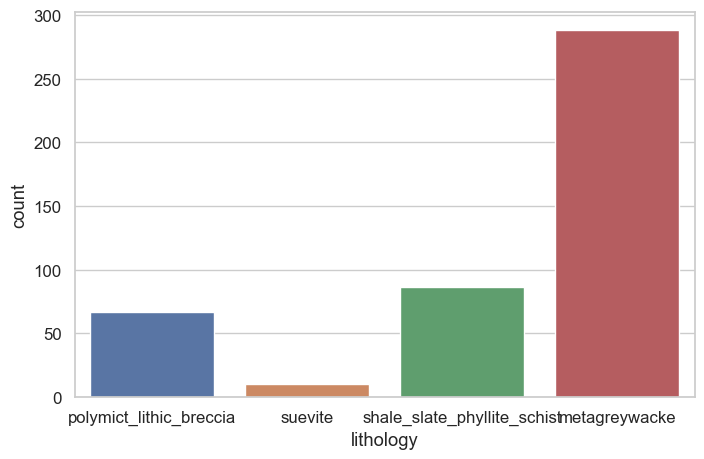

In [9]:
sns.countplot(x=lb08A["lithology"])